In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import kagglehub
# Download the Heart Disease dataset from Kaggle
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
data=pd.read_csv(path + '/heart.csv')
data.head()

100%|██████████| 6.18k/6.18k [00:00<00:00, 9.64MB/s]

Extracting files...


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
features = data.drop(columns=['target'])
target = data['target']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

svd = TruncatedSVD(n_components=5, random_state=42)
svd_features = svd.fit_transform(scaled_features)
explained_variance = svd.explained_variance_ratio_
svd_features_df = pd.DataFrame(svd_features, columns=[f'SVD_Component_{i+1}' for i in range(svd_features.shape[1])])
explained_variance, svd_features_df.head()

(array([0.21369912, 0.11971959, 0.09238384, 0.08994039, 0.07685925]),
    SVD_Component_1  SVD_Component_2  SVD_Component_3  SVD_Component_4  \
 0        -0.522556        -1.112803         0.956816         1.149198   
 1         2.590381        -0.533162         1.467315        -1.536614   
 2         3.042352        -1.327521        -0.424765        -1.567204   
 3        -0.492522        -0.276720         0.801442         0.984277   
 4         2.187464         1.951477        -0.385539        -0.295793   
 
    SVD_Component_5  
 0         0.559252  
 1        -1.345335  
 2        -0.283814  
 3         0.487587  
 4         2.386144  )

Text(0.5, 1.0, 'Singular Values of Components')

<Figure size 1200x500 with 0 Axes>

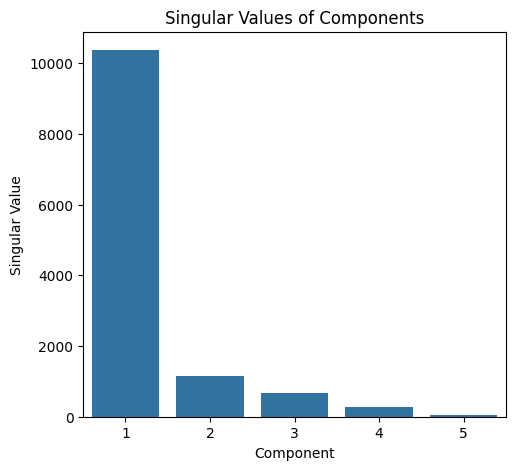

In [6]:
# Singular Values of Components
svd = TruncatedSVD(n_components=5)

svd.fit(features)

singular_values = svd.singular_values_

plt.figure(figsize=(12, 5))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(1, len(singular_values) + 1), y=singular_values)
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values of Components')


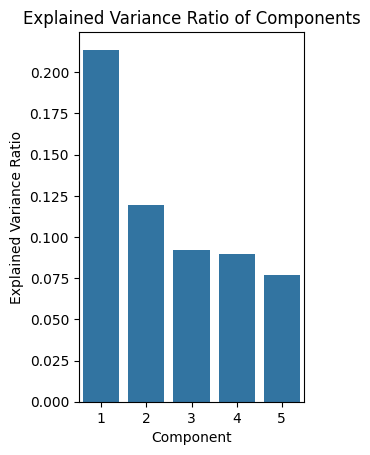

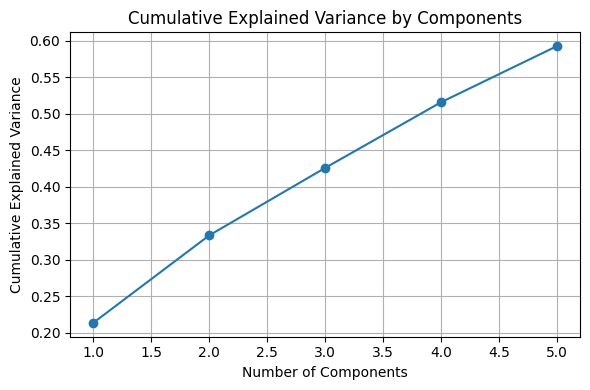

In [10]:
plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Components')

# Cumulative explained variance plot
cumulative_explained_ratios = np.cumsum(explained_variance)
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(cumulative_explained_ratios) + 1), cumulative_explained_ratios, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Components')
plt.grid(True)

plt.tight_layout()
plt.show()

correlations = pd.DataFrame(np.dot(scaled_features.T, svd_features) / (len(scaled_features) - 1),
                            index=features.columns,
                            columns=[f'SVD_Component_{i+1}' for i in range(svd_features.shape[1])])

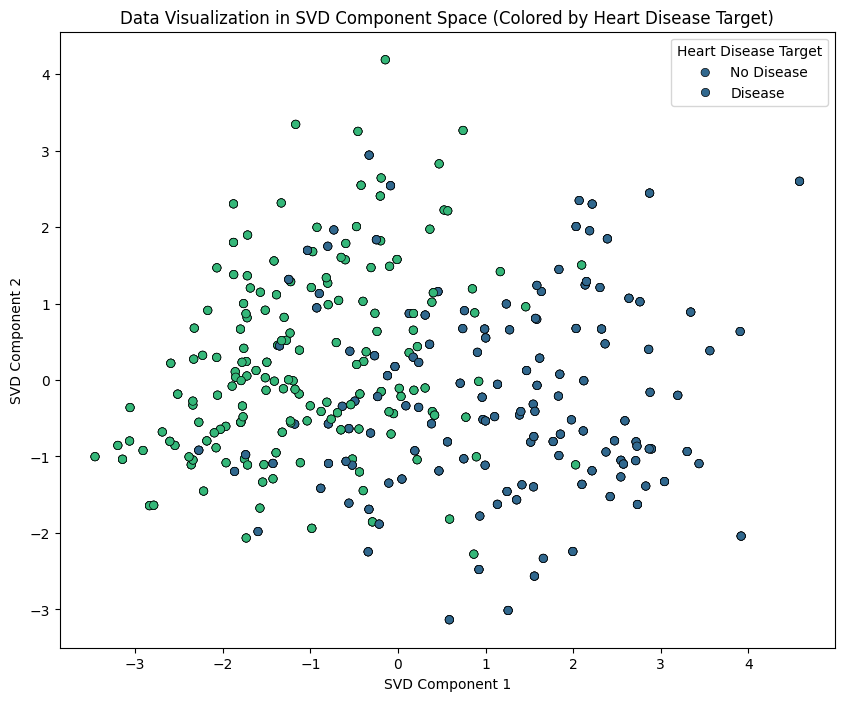

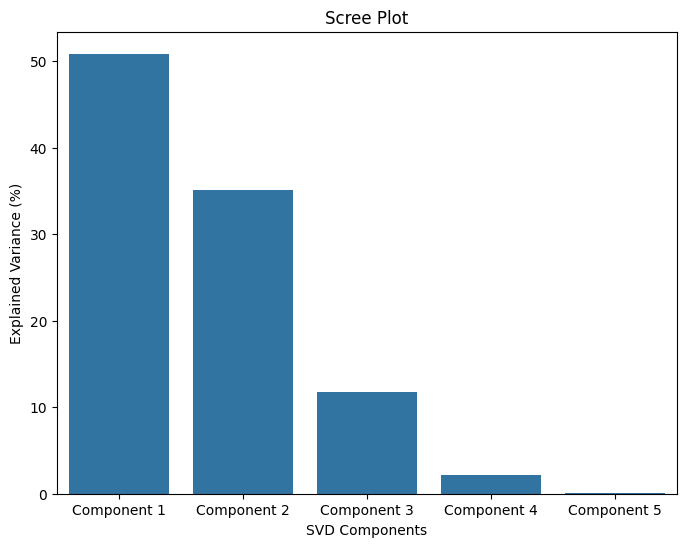

In [12]:
correlations = pd.DataFrame(np.dot(scaled_features.T, svd_features) / (len(scaled_features) - 1),
                            index=features.columns,
                            columns=[f'SVD_Component_{i+1}' for i in range(svd_features.shape[1])])

plt.figure(figsize=(10, 8))
sns.scatterplot(x=svd_features[:, 0], y=svd_features[:, 1], hue=target, palette="viridis", edgecolor='k')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Data Visualization in SVD Component Space (Colored by Heart Disease Target)')
plt.legend(title="Heart Disease Target", labels=['No Disease', 'Disease'])
plt.show()
explained_variance = svd.explained_variance_ratio_
plt.figure(figsize=(8,6))
sns.barplot(x=[f'Component {i+1}' for i in range(len(explained_variance))],
            y=explained_variance * 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('SVD Components')
plt.title('Scree Plot')
plt.show()


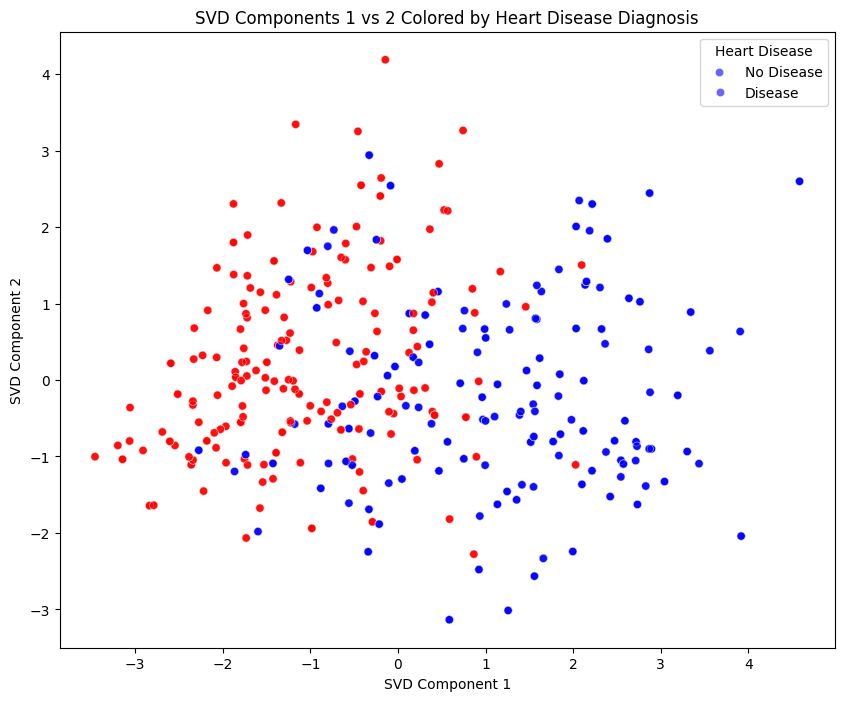

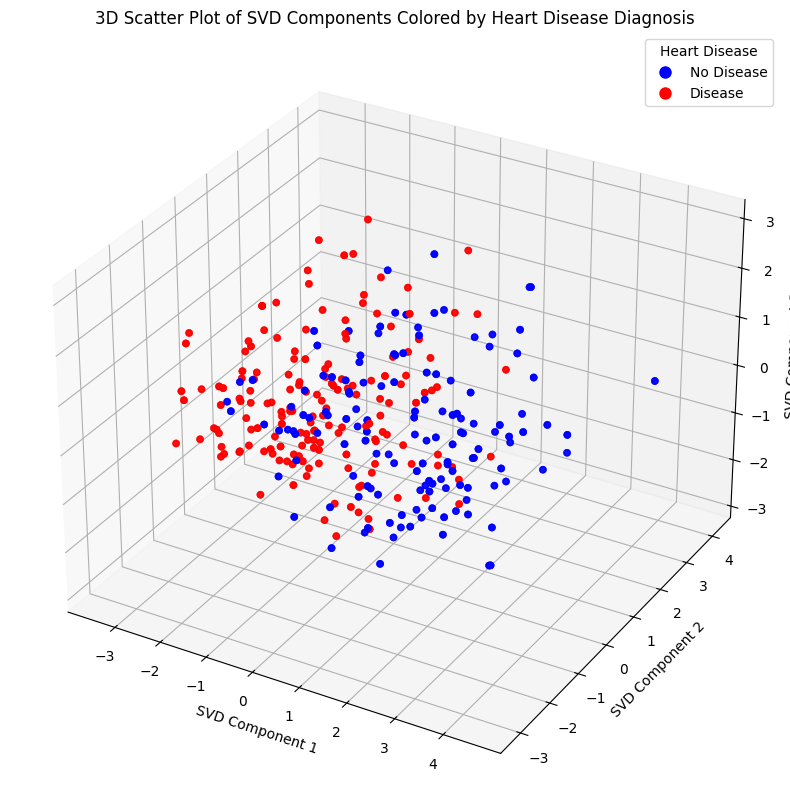

In [13]:
svd_plot_df = svd_features_df.copy()
svd_plot_df['target'] = target
plt.figure(figsize=(10,8))
sns.scatterplot(data=svd_plot_df,
                x='SVD_Component_1',
                y='SVD_Component_2',
                hue='target',
                palette=['blue', 'red'],
                alpha=0.6)
plt.title('SVD Components 1 vs 2 Colored by Heart Disease Diagnosis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

colors = svd_plot_df['target'].map({0: 'blue', 1: 'red'})

ax.scatter(svd_plot_df['SVD_Component_1'],
           svd_plot_df['SVD_Component_2'],
           svd_plot_df['SVD_Component_3'],
           c=colors, alpha=0.6)


ax.set_title('3D Scatter Plot of SVD Components Colored by Heart Disease Diagnosis')
ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='No Disease',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Disease',
                          markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, title='Heart Disease')

plt.show()


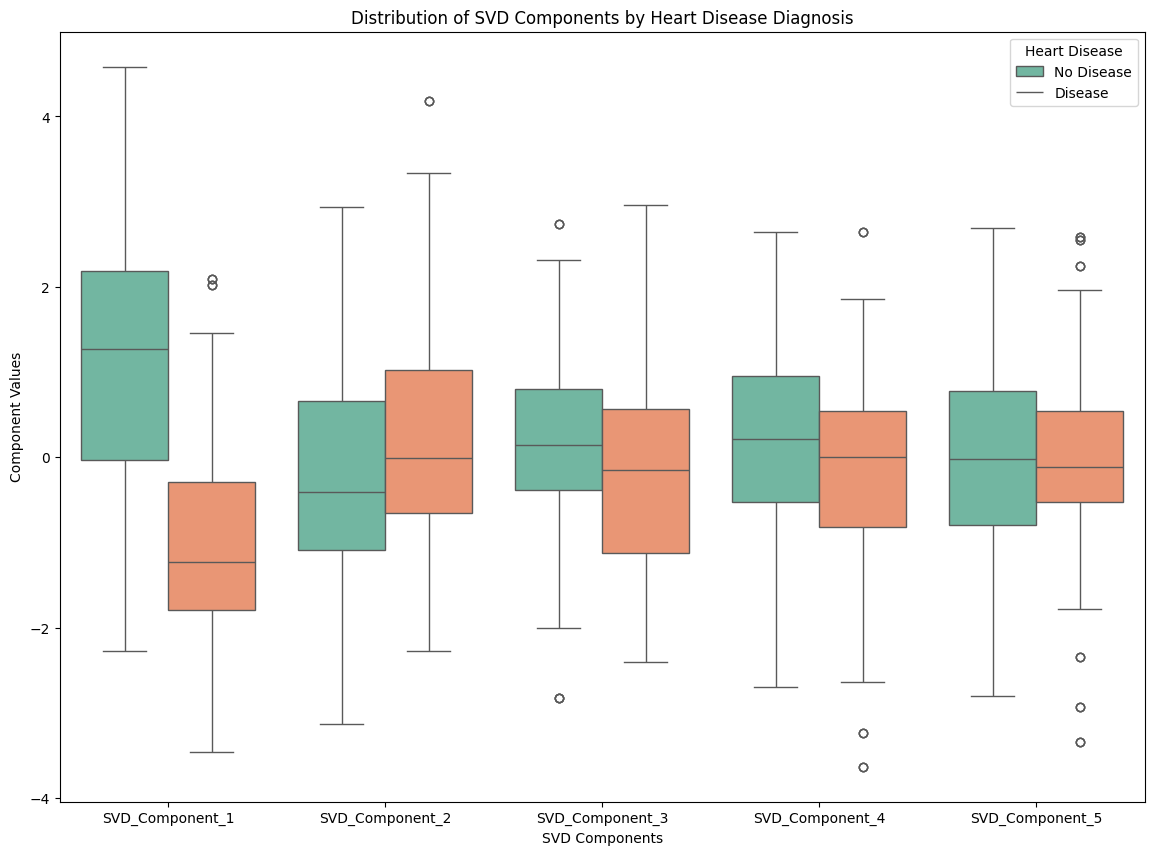

In [14]:
melted_df = svd_plot_df.melt(id_vars='target',
                             value_vars=[f'SVD_Component_{i+1}' for i in range(svd.n_components)], # Use svd.n_components
                             var_name='SVD_Component',
                             value_name='Value')
plt.figure(figsize=(14,10))
sns.boxplot(x='SVD_Component', y='Value', hue='target', data=melted_df, palette='Set2')
plt.title('Distribution of SVD Components by Heart Disease Diagnosis')
plt.xlabel('SVD Components')
plt.ylabel('Component Values')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


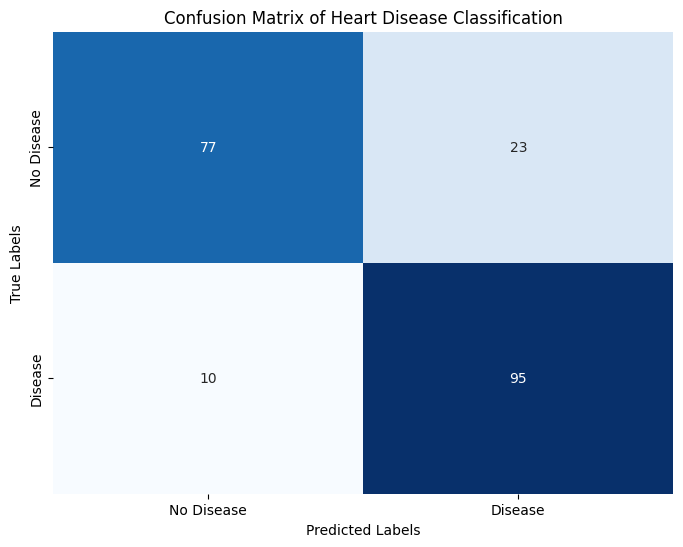

Classification Report:
              Precision  Recall  F1-Score  Support
No Disease         0.89    0.77      0.82   100.00
Disease            0.81    0.90      0.85   105.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.85    0.84      0.84   205.00
weighted avg       0.84    0.84      0.84   205.00

Overall Accuracy:0.84


In [16]:
X_train, X_test, y_train, y_test = train_test_split(svd_features_df, target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Heart Disease Classification")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=["No Disease", "Disease"], output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df = report_df.round(2)

report_df = report_df.rename(columns={
    "precision": "Precision",
    "recall": "Recall",
    "f1-score": "F1-Score",
    "support": "Support"
})
print("Classification Report:")
print(report_df)
print(f"\nOverall Accuracy:{accuracy_score(y_test, y_pred):.2f}")
